***Carga de las bibliotecas***

In [62]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
#import scikitplot.metrics as splt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

***Carga del dataset***

In [63]:
df = pd.read_csv('/content/drive/MyDrive/ESCOM/8vo Semestre/Data Mining/Extraordinario/Social_Network_Ads.csv')

***Análisis de los datos***

In [64]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [66]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [67]:
df.isnull().all()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

***Distribución de los datos***

Diagramas de caja y bigote, e histogramas

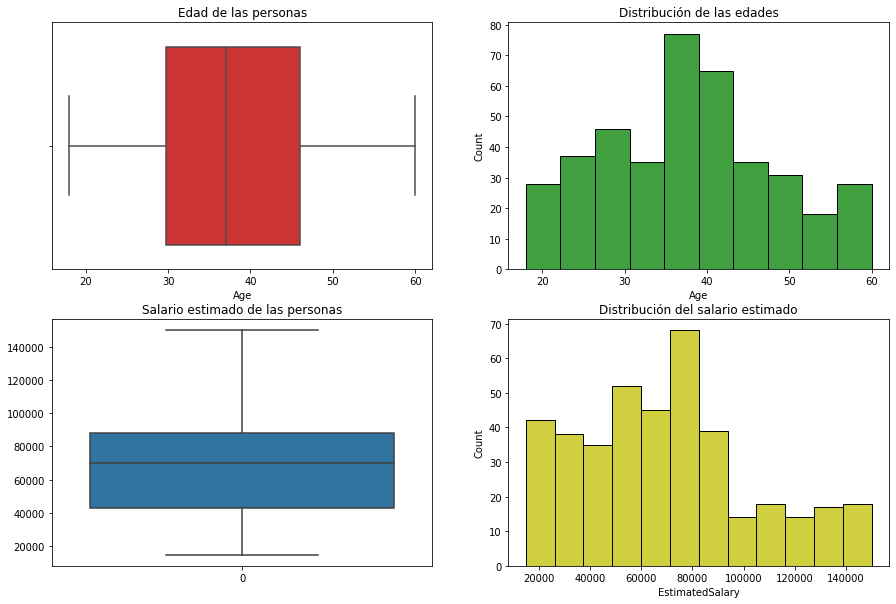

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0,0],x= df['Age'], palette = "Set1")
axes[0,0].set_title('Edad de las personas')
sns.histplot(ax=axes[0,1],x='Age',data=df,color="g")
axes[0,1].set_title('Distribución de las edades')

sns.boxplot(ax=axes[1,0],data = df['EstimatedSalary'])
axes[1,0].set_title('Salario estimado de las personas')
sns.histplot(ax=axes[1,1],x='EstimatedSalary',data=df,color="y")
axes[1,1].set_title('Distribución del salario estimado')
plt.show()

Diagramas de caja y bigote

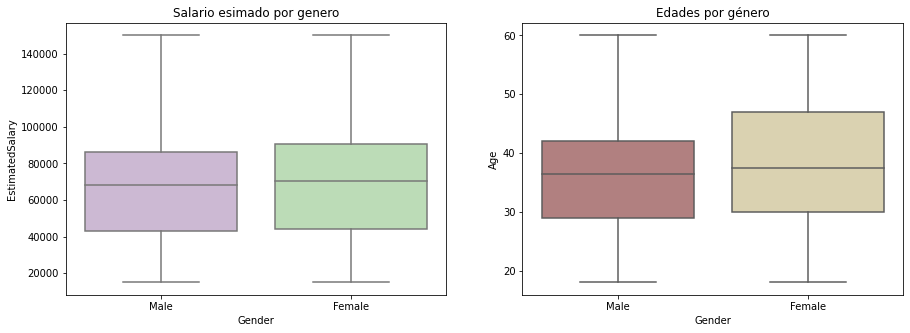

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Salario esimado por genero')

sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")
axes[1].set_title('Edades por género')
plt.show()

Histogramas

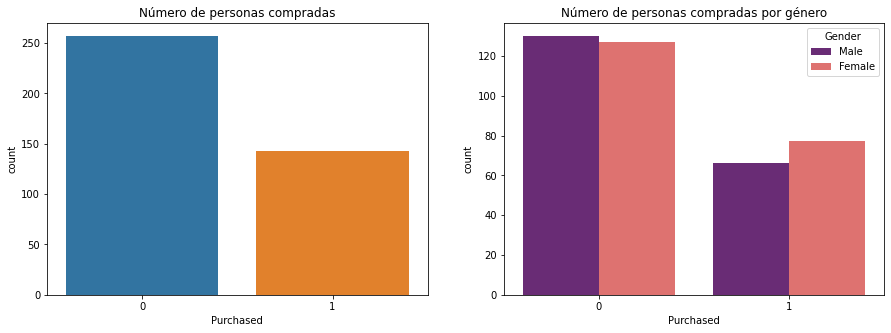

In [70]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',data=df)
axes[0].set_title('Número de personas compradas')
sns.countplot(ax=axes[1],x='Purchased',hue='Gender',data=df,palette="magma")
axes[1].set_title('Número de personas compradas por género')
plt.show()

In [71]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


Mapa de calor

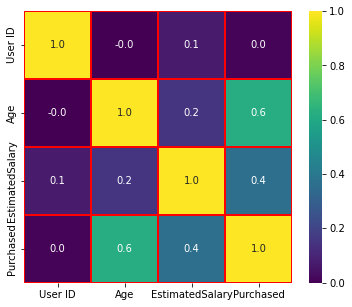

In [72]:
f,ax = plt.subplots(figsize=(6, 5))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)
plt.show()

***Preparado los datos***

In [73]:
df.drop('User ID',axis = 1, inplace = True)
label = {'Male': 0 ,"Female" : 1}
df['Gender'].replace(label, inplace= True)

***Predicción***

Configuración de entradas y salidas

In [74]:
X = df.drop('Purchased',axis = 1)     
y = df['Purchased']

Escaliento de los datos

In [75]:
scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()

,0,1,2
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [76]:
X_train,X_test,y_train,y_test = train_test_split(d_scaled,y,test_size=0.20,random_state=42)

model = LogisticRegression(C=0.1,max_iter = 500)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# y = B + W*x1...
print(f'Coeficiente de peso : {model.coef_}')
print(f'Bias : {model.intercept_}')

Coeficiente de peso : [[-0.06210386  1.39043467  0.79306064]]
Bias : [-0.8686142]


***Resultados de la predicción***

Precisión

In [77]:
print(f'Precisión de la prueba: {model.score(X_test,y_test)}')
print(f'Precisión del entrenamiento: {model.score(X_train,y_train)}')

Precisión de la prueba: 0.8625
Precisión del entrenamiento: 0.8125


Reporte de clasificación

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



Matriz de confusión

In [79]:
df = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  columns = ['Positivo predictivo', 'Negativo predictivo'], 
                  index=['Positivo verdadero', 'Negativo Verdadero'])
df
#plt.plot_confusion_matrix(y_test,y_pred,figsize=(7,7))
#plt.show()

,Positivo predictivo,Negativo predictivo
Positivo verdadero,50,2
Negativo Verdadero,9,19


Medidas de la predicción

In [80]:
print("Exactitud:", accuracy_score(y_test,y_pred))
print("Precisión:", precision_score(y_test, y_pred, ))
print("Llamada:", recall_score(y_test,y_pred))
print("F1 Puntaje:", f1_score(y_test,y_pred))

Exactitud: 0.8625
Precisión: 0.9047619047619048
Llamada: 0.6785714285714286
F1 Puntaje: 0.7755102040816326


Área bajo la curva

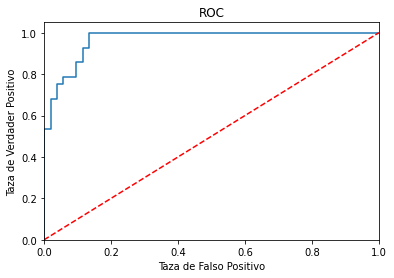

In [81]:
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('Taza de Falso Positivo')
plt.ylabel('Taza de Verdader Positivo')
plt.title('ROC')
plt.show()

***Finalmente, podemos utilizar el método SMOTE, que es un proceso de aumento de datos, para aumentar la tasa de aprendizaje.***

In [82]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)

print(f'Prueba de exactitud {model_res.score(X_test,y_test)}')

Prueba de exactitud 0.9


***Comparación del tamaño del conjunto de entrenamiento para el modelo***

In [83]:
print(f'Originalmente: {X_train.shape}')
print(f'Aplicando el método SMOTE: {X_train_res.shape}')

Originalmente: (320, 3)
Aplicando el método SMOTE: (410, 3)
